# IviumSoft control with python

### Import libraries:

In [11]:
from pyvium import Pyvium as iv
from pyvium import Core as ivc

# Some extra libraries ---------
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt

### Open driver and connect device:

In [12]:
iv.open_driver()
iv.connect_device()

### Start a method and show progress

In [13]:
iv.start_method("C:/IviumStat/datafiles/TEST1.imf")

def get_progress():
    total_points = 201
    points = iv.get_available_data_points_number()
    return 100*points/total_points

progress = 0
while progress<100:
    progress = get_progress()
    print('Measurement Progress: ',round(progress,0),'%', end="\r")
    sleep(0.1)   

### Get the result as a pandas dataframe

In [8]:
def get_all_datapoints():
    total_points = iv.get_available_data_points_number()
    data = []
    for point_index in range(1,total_points+1):
        t,V,I = iv.get_data_point(point_index)
        data.append([t,V,I])
    return data

data = get_all_datapoints()

df = pd.DataFrame(data, columns=['Time(s)', 'Potential(V)', 'Current(A)'])
print(df.head())

   Time(s)  Potential(V)  Current(A)
0    0.000 -2.118154e-07   -0.000061
1    0.005  4.780211e-06    0.004931
2    0.010  9.784898e-06    0.009931
3    0.015  1.477790e-05    0.014937
4    0.020  1.976652e-05    0.019888


### Plot the results using matplotlib

<Axes: >

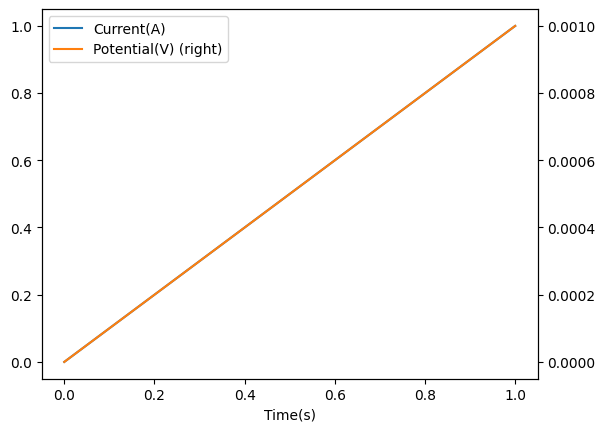

In [14]:
ax = df.plot('Time(s)','Current(A)')
df.plot('Time(s)','Potential(V)',secondary_y=True, ax=ax)

In [15]:
ivc.IV_getDbFileName()

(0, 'DataServer_R5422')

In [16]:
iv.close_driver()